In [1]:
import shapely
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon

In [3]:
import fiona
# Open the dataset from the file
shapefile = fiona.open('data/rcr/rcr_landcover.shp')
# Make sure the dataset exists -- it would be None if we couldn't open it
if not shapefile:
    print('Error: could not open shapefile')

In [4]:
# Let's get the driver from this file
driver = shapefile.driver
print('Dataset driver is: {n}\n'.format(n=driver))

# How many features are contained in this Shapefile?
feature_count = len(shapefile)
print('The shapefile has {n} feature(s)\n'.format(n=feature_count))

# What is the shapefiles's projection?
# Get the spatial reference
spatial_ref = shapefile.crs
print('The shapefiles spatial ref is:\n', spatial_ref, '\n')

# Let's pull out a specific feature from the shapefile
feature = shapefile[0]

#What is the features's geometry? is it a point? a polyline? a polygon?
geometry = feature['geometry']['type']
print("The features's geometry is: {geom}\n".format(geom=geometry))

# How many properties are in the shapefile, and what are their names?
properties = feature["properties"].keys()

# How many fields
field_count = len(properties)
print('Layer has {n} fields'.format(n=field_count))

# What are their names?
print('Their names are: ')
for prop in properties:
    print('\t{name}'.format(name=prop))

Dataset driver is: ESRI Shapefile

The shapefile has 23 feature(s)

The shapefiles spatial ref is:
 {'init': 'epsg:32618'} 

The features's geometry is: Polygon

Layer has 2 fields
Their names are: 
	Classname
	Classvalue


In [5]:
# you can get a quick view of all of this
shapefile.meta


{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('Classname', 'str:80'),
               ('Classvalue', 'int:18')]),
  'geometry': 'Polygon'},
 'crs': {'init': 'epsg:32618'},
 'crs_wkt': 'PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'}

In [6]:
feature = shapefile[0]
feature # The result is a Python dictionary

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('Classname', 'Sand'), ('Classvalue', 2253)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(346494.47052450513, 3840484.890103262),
    (346512.1633455531, 3840444.4037230057),
    (346425.2387005355, 3840344.6287597455),
    (346417.20767719497, 3840413.2025623657),
    (346494.47052450513, 3840484.890103262)]]}}

In [7]:
feature.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [8]:
print('id: ', feature['id']) #gives the id
print('Classname: ', feature['properties']['Classname']) # gives the value of the classname attribute

print('\ngeometry: ', feature['geometry']) # gives the geometry, GeoJSON format


id:  0
Classname:  Sand

geometry:  {'type': 'Polygon', 'coordinates': [[(346494.47052450513, 3840484.890103262), (346512.1633455531, 3840444.4037230057), (346425.2387005355, 3840344.6287597455), (346417.20767719497, 3840413.2025623657), (346494.47052450513, 3840484.890103262)]]}


<class 'shapely.geometry.polygon.Polygon'>


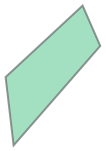

In [9]:
shapely_shape = shape(feature['geometry'])
print(type(shapely_shape))

shapely_shape

In [12]:
import rasterio
import numpy as np
import geopandas as gpd
dataset = rasterio.open('data/sentinel-2/2018-10-13, Sentinel-2B L1C, B08.tiff')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [13]:
shapefile = gpd.read_file('data/rcr/rcr_landcover.shp')
shapefile.head()

,Classname,Classvalue,geometry
0,Sand,2253,"POLYGON ((346494.471 3840484.890, 346512.163 3..."
1,Forested Wetland,2360,"POLYGON ((347156.620 3842382.623, 347140.569 3..."
2,Forested Wetland,2360,"POLYGON ((347374.249 3842272.855, 347343.280 3..."
3,Sand,2253,"POLYGON ((347752.940 3842285.305, 347732.080 3..."
4,Emergent Wetland,2260,"POLYGON ((352462.707 3840569.388, 352421.826 3..."


In [14]:
shapefile_filtered = shapefile.filter(['Classname', 'geometry'])
shapefile_filtered.head()


,Classname,geometry
0,Sand,"POLYGON ((346494.471 3840484.890, 346512.163 3..."
1,Forested Wetland,"POLYGON ((347156.620 3842382.623, 347140.569 3..."
2,Forested Wetland,"POLYGON ((347374.249 3842272.855, 347343.280 3..."
3,Sand,"POLYGON ((347752.940 3842285.305, 347732.080 3..."
4,Emergent Wetland,"POLYGON ((352462.707 3840569.388, 352421.826 3..."


In [15]:
dataset.crs


CRS.from_epsg(4326)

In [16]:
from pyproj import CRS

CRS(dataset.crs)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
shapefile.crs

<Derived Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
from pyproj import Transformer
from pyproj import Proj

# this will get our four corner points
raster_gps_points = dataset.transform * (0, 0), dataset.transform * (dataset.width, 0), dataset.transform * (dataset.width, dataset.height), dataset.transform * (0, dataset.height),

# Project all longitudes, latitudes using the pyproj package
p1 = Proj(dataset.crs) # our current crs
p2 = Proj(shapefile.crs) # the crs we want our raster to be in
# we could also specifc UTM 18N as:
#   p2 = Proj("+proj=utm +zone=18, +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# use the pyproj Transformer.transform function to convert the positions to longs, lats
transformer = Transformer.from_crs(p1.crs, p2.crs)
UTMx, UTMy = transformer.transform(np.array(raster_gps_points)[:,1],np.array(raster_gps_points)[:,0])

raster_utm_points = list(zip(UTMx, UTMy)) # zip up the points so they're in the form [(lat, long), ...]

print('raster bounds in UTM 18N:\n', raster_utm_points, '\n')
print('raster bounds in lat, lon:\n', raster_gps_points)

raster bounds in UTM 18N:
 [(342874.29359233467, 3844458.611782608), (364501.9870325172, 3844114.8502116846), (364236.96553226013, 3826072.8217074675), (342566.93812409707, 3826415.843995134)] 

raster bounds in lat, lon:
 ((-76.716188, 34.730144), (-76.479982, 34.730144), (-76.479982, 34.567461), (-76.716188, 34.567461))


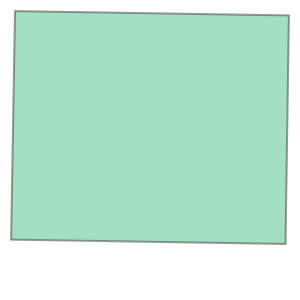

In [19]:
# we can make a simple Shapely shape out of these bounds if we want
raster_geometry = {
    'type' : 'Polygon',
    'coordinates' : [list(raster_utm_points)]     
         }
raster_shape = shape(raster_geometry)
raster_shape

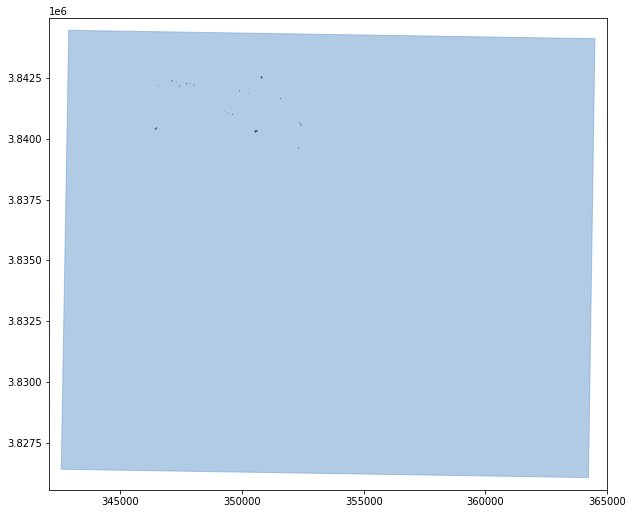

In [20]:
from descartes import PolygonPatch # this package helps us plot polygons and is used internally by GeoPandas to plot
import matplotlib.pyplot as plt

BLUE = '#6699cc'
GRAY = '#000000'

fig, ax = plt.subplots(figsize=(10,10))

# add raster bounds
poly1patch = PolygonPatch(raster_shape, fc=BLUE, ec=BLUE, alpha=0.5)
ax.add_patch(poly1patch)

# While we could do something like this:
#     for feat in shapefile:
#         ax.add_patch(PolygonPatch(shape(feat['geometry']), fc=GRAY, ec=GRAY, alpha=0.5, zorder=2))

# Geopandas implements this internally so all we need to do is:

shapefile.plot(ax=ax, color='black')

xrange = [int(min(raster_shape.exterior.xy[0]))-500, int(max(raster_shape.exterior.xy[0]))+500]
yrange = [int(min(raster_shape.exterior.xy[1]))-500, int(max(raster_shape.exterior.xy[1]))+500]

ax.set_xlim(*xrange)
ax.set_ylim(*yrange)
ax.set_aspect('equal')
plt.show()

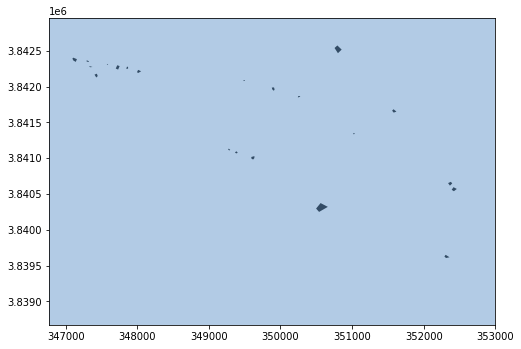

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

# add raster bounds
poly1patch = PolygonPatch(raster_shape, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax.add_patch(poly1patch)

shapefile.plot(ax=ax, color='black')

xrange = [int(min(raster_shape.exterior.xy[0]))+4200, int(max(raster_shape.exterior.xy[0]))-11500]
yrange = [int(min(raster_shape.exterior.xy[1]))+12600, int(max(raster_shape.exterior.xy[1]))-1500]
ax.set_xlim(*xrange)
ax.set_ylim(*yrange)
ax.set_aspect('equal')
plt.show()

In [23]:
import folium # let's make an interactive map using leaflet

# folium requires lat, long but dataset.transform outputs long, lat so reversing them:
raster_gps_reversed = list(zip(np.array(raster_gps_points)[:,1], np.array(raster_gps_points)[:,0]))

# creating these points just to set the map center
lat, long = raster_gps_reversed[1] 

# create the folium map object
m = folium.Map(location=[lat, long], zoom_start=11) # set the map centered around the first point

# this actually adds the polygon to the map
folium.Polygon(raster_gps_reversed, 
               popup='Sentinel-2 Image Bounds',
               color='#3186cc',
               fill=True,
               fill_color='#3186cc'
              ).add_to(m)

# there may be a more efficient way to add these, need to check recent folium updates
for index in range(0, len(shapefile)):
    # pick out each feature by its index
    feat = shapefile.iloc[index]
    feat_geom = shape(feat['geometry'])
    feat_name = feat['Classname']
    
    # have to do error catching because .exterior.xy doesn't work for multipart polygons
    try:
        # again use Pyproj to reproject the crs now in the opposite direction
        p1 = Proj(shapefile.crs)
        p2 = Proj(dataset.crs) # we want to display on folium using WGS84
        # we could also do
        #    p2 = Proj(proj='latlong',datum='WGS84') # we want to display on folium using WGS84
        # use the pyproj Transformer.transform function to convert the positions to longs, lats
        transformer = Transformer.from_crs(p1.crs, p2.crs)
        lats, longs = transformer.transform(feat_geom.exterior.xy[0], feat_geom.exterior.xy[1])
        gps_points = list(zip(lats, longs)) # zip up the points so they're in the form [(lat, long), ...]

        folium.Polygon(gps_points, 
                   tooltip=feat_name, 
                   color='#000000',
                   fill=True,
                   fill_color='#99999'
                      ).add_to(m)
    except AttributeError:
        pass
m